### Environment Setup & Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#RANDOM_STATE = 42

In [2]:
raw_data = pd.read_csv(r"C:/Users/97252/Desktop/Chen_proj/data/data.csv")

### Initial Data Integrity Assessment

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29744 entries, 0 to 29743
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             29744 non-null  int64  
 1   OCCUR_DATE               29744 non-null  object 
 2   OCCUR_TIME               29744 non-null  object 
 3   BORO                     29744 non-null  object 
 4   LOC_OF_OCCUR_DESC        4148 non-null   object 
 5   PRECINCT                 29744 non-null  int64  
 6   JURISDICTION_CODE        29742 non-null  float64
 7   LOC_CLASSFCTN_DESC       4148 non-null   object 
 8   LOCATION_DESC            14767 non-null  object 
 9   STATISTICAL_MURDER_FLAG  29744 non-null  bool   
 10  PERP_AGE_GROUP           20400 non-null  object 
 11  PERP_SEX                 20434 non-null  object 
 12  PERP_RACE                20434 non-null  object 
 13  VIC_AGE_GROUP            29744 non-null  object 
 14  VIC_SEX               

In [4]:
raw_data.describe(include=[np.number]).T[['min', 'max', 'mean', '50%']]

,min,max,mean,50%
INCIDENT_KEY,9.953245e+06,2.994625e+08,1.338510e+08,1.092920e+08
PRECINCT,1.000000e+00,1.230000e+02,6.522502e+01,6.700000e+01
JURISDICTION_CODE,0.000000e+00,2.000000e+00,3.181023e-01,0.000000e+00
Latitude,4.051159e+01,4.091082e+01,4.073951e+01,4.070322e+01
Longitude,-7.424930e+01,-7.370205e+01,-7.390903e+01,-7.391487e+01


In [5]:
raw_data.duplicated().sum()

np.int64(0)

### Preliminary Data Cleaning (Row-Level)

##### Type Casting

In [6]:
raw_data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,231974218,08/09/2021,01:06:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1006343,234270,40.809673,-73.920193,POINT (-73.92019278899994 40.80967347200004)
1,177934247,04/07/2018,19:48:00,BROOKLYN,NaN,79,0.0,NaN,NaN,True,...,M,WHITE HISPANIC,25-44,M,BLACK,1000082.937500000000000,189064.671875000000000,40.685610,-73.942913,POINT (-73.94291302299996 40.685609672000055)
2,255028563,12/02/2022,22:57:00,BRONX,OUTSIDE,47,0.0,STREET,GROCERY/BODEGA,False,...,(null),(null),25-44,M,BLACK,1020691,257125,40.872349,-73.868233,POINT (-73.868233 40.872349)
3,25384540,11/19/2006,01:50:00,BROOKLYN,NaN,66,0.0,NaN,PVT HOUSE,True,...,U,UNKNOWN,18-24,M,BLACK,985107.312500000000000,173349.796875000000000,40.642490,-73.996912,POINT (-73.99691224999998 40.642489932000046)
4,72616285,05/09/2010,01:58:00,BRONX,NaN,46,0.0,NaN,MULTI DWELL - APT BUILD,True,...,M,BLACK,<18,F,BLACK,1009853.500000000000000,247502.562500000000000,40.845984,-73.907461,POINT (-73.90746098599993 40.84598358900007)


In [7]:
raw_data.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
LOC_OF_OCCUR_DESC           object
PRECINCT                     int64
JURISDICTION_CODE          float64
LOC_CLASSFCTN_DESC          object
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                  object
Y_COORD_CD                  object
Latitude                   float64
Longitude                  float64
Lon_Lat                     object
dtype: object

In [8]:
raw_data['OCCUR_DATE'] = pd.to_datetime(raw_data['OCCUR_DATE'], format='%m/%d/%Y')
raw_data['OCCUR_TIME'] = pd.to_datetime(raw_data['OCCUR_TIME'], format='%H:%M:%S').dt.time

# המרת מספרים שלמים ובוליאניים
raw_data['JURISDICTION_CODE'] = raw_data['JURISDICTION_CODE'].astype('Int64')
raw_data['STATISTICAL_MURDER_FLAG'] = raw_data['STATISTICAL_MURDER_FLAG'].astype(bool)

# המרת קטגוריות
categorical_cols = ['BORO', 'PERP_SEX','PERP_RACE', 'PERP_AGE_GROUP',
'VIC_SEX', 'VIC_RACE', 'VIC_AGE_GROUP','LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC','PRECINCT']

for col in categorical_cols:
    raw_data[col] = raw_data[col].astype('category')

# ניקוי פסיקים מקואורדינטות (כטקסט)
raw_data['X_COORD_CD'] = raw_data['X_COORD_CD'].astype(str).str.replace(',', '')
raw_data['Y_COORD_CD'] = raw_data['Y_COORD_CD'].astype(str).str.replace(',', '')

# המרה למספר עשרוני (Float)
raw_data['X_COORD_CD'] = pd.to_numeric(raw_data['X_COORD_CD'], errors='coerce')
raw_data['Y_COORD_CD'] = pd.to_numeric(raw_data['Y_COORD_CD'], errors='coerce')

In [9]:
raw_data.dtypes

INCIDENT_KEY                        int64
OCCUR_DATE                 datetime64[ns]
OCCUR_TIME                         object
BORO                             category
LOC_OF_OCCUR_DESC                category
PRECINCT                         category
JURISDICTION_CODE                   Int64
LOC_CLASSFCTN_DESC               category
LOCATION_DESC                    category
STATISTICAL_MURDER_FLAG              bool
PERP_AGE_GROUP                   category
PERP_SEX                         category
PERP_RACE                        category
VIC_AGE_GROUP                    category
VIC_SEX                          category
VIC_RACE                         category
X_COORD_CD                        float64
Y_COORD_CD                        float64
Latitude                          float64
Longitude                         float64
Lon_Lat                            object
dtype: object

##### Dropping Irrelevant & Redundant Features

            Latitude  Y_COORD_CD
Latitude         1.0         1.0
Y_COORD_CD       1.0         1.0
            Longitude  X_COORD_CD
Longitude    1.000000    0.999998
X_COORD_CD   0.999998    1.000000


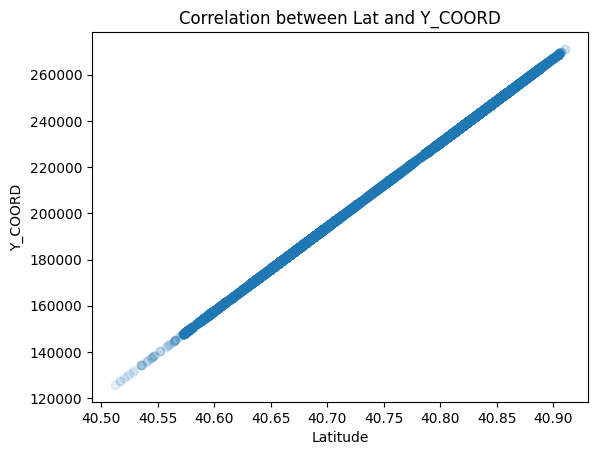

In [10]:
# בדיקת קורלציה בין הקואורדינטות
print(raw_data[['Latitude', 'Y_COORD_CD']].corr())
print(raw_data[['Longitude', 'X_COORD_CD']].corr())

# ויזואליזציה מהירה
import matplotlib.pyplot as plt
plt.scatter(raw_data['Latitude'], raw_data['Y_COORD_CD'], alpha=0.1)
plt.title("Correlation between Lat and Y_COORD")
plt.xlabel("Latitude")
plt.ylabel("Y_COORD")
plt.show()

In [11]:
# רשימת עמודות למחיקה מיידית (IDs וכפילויות קואורדינטות)
# סיבה: INCIDENT_KEY הוא מזהה שרירותי. X/Y הם יתירות של Lat/Lon.
cols_to_drop = ['INCIDENT_KEY', 'X_COORD_CD', 'Y_COORD_CD','Lon_Lat']

raw_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')


##### Logic correction

In [12]:
raw_data.dtypes

OCCUR_DATE                 datetime64[ns]
OCCUR_TIME                         object
BORO                             category
LOC_OF_OCCUR_DESC                category
PRECINCT                         category
JURISDICTION_CODE                   Int64
LOC_CLASSFCTN_DESC               category
LOCATION_DESC                    category
STATISTICAL_MURDER_FLAG              bool
PERP_AGE_GROUP                   category
PERP_SEX                         category
PERP_RACE                        category
VIC_AGE_GROUP                    category
VIC_SEX                          category
VIC_RACE                         category
Latitude                          float64
Longitude                         float64
dtype: object

In [13]:
raw_data['JURISDICTION_CODE'].unique
raw_data.drop(columns='JURISDICTION_CODE', inplace=True, errors='ignore')

In [14]:
# בדיקת ערכים ייחודיים בעמודות הדמוגרפיות
# המטרה: למצוא ערכים כמו '1020', 'UNKNOWN', '(null)'

categorical_cols = ['BORO', 'PERP_SEX', 'PERP_RACE', 'PERP_AGE_GROUP',
'VIC_SEX', 'VIC_RACE', 'VIC_AGE_GROUP','LOC_OF_OCCUR_DESC', 
'LOC_CLASSFCTN_DESC', 'LOCATION_DESC','PRECINCT']

print("--- Categorical Values Inspection ---")
for col in categorical_cols:
    if col in raw_data.columns:
        print(f"\n🔻 Column: {col}")
        # הצגת כל הערכים הייחודיים ברשימה
        print(raw_data[col].unique().tolist())

--- Categorical Values Inspection ---

🔻 Column: BORO
['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

🔻 Column: PERP_SEX
[nan, 'M', '(null)', 'U', 'F']

🔻 Column: PERP_RACE
[nan, 'WHITE HISPANIC', '(null)', 'UNKNOWN', 'BLACK', 'BLACK HISPANIC', 'ASIAN / PACIFIC ISLANDER', 'WHITE', 'AMERICAN INDIAN/ALASKAN NATIVE']

🔻 Column: PERP_AGE_GROUP
[nan, '25-44', '(null)', 'UNKNOWN', '18-24', '<18', '45-64', '65+', '1028', '1020', '940', '224', '2021']

🔻 Column: VIC_SEX
['M', 'F', 'U']

🔻 Column: VIC_RACE
['BLACK', 'WHITE HISPANIC', 'BLACK HISPANIC', 'ASIAN / PACIFIC ISLANDER', 'WHITE', 'UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE']

🔻 Column: VIC_AGE_GROUP
['18-24', '25-44', '<18', '45-64', '65+', 'UNKNOWN', '1022']

🔻 Column: LOC_OF_OCCUR_DESC
[nan, 'OUTSIDE', 'INSIDE']

🔻 Column: LOC_CLASSFCTN_DESC
[nan, 'STREET', 'OTHER', 'PLAYGROUND', 'TRANSIT', 'HOUSING', 'COMMERCIAL', 'DWELLING', 'VEHICLE', 'PARKING LOT', '(null)']

🔻 Column: LOCATION_DESC
[nan, 'GROCERY/BODEGA', 'PVT HOUSE

##### Hypothesis Testing: Do Missing Values Indicate Unsolved Crimes?